In [1]:
from vit_favor import ViTForClassfication

import torch
from torch import nn, optim

import os

In [2]:
import matplotlib.pyplot as plt

In [3]:
from config import data_config
from data import load_data
from trainer import Trainer

In [4]:
torch.cuda.empty_cache()
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

In [5]:
exp_name = 'vit-with-20-epochs'
batch_size = 64
epochs = 2
lr = 1e-4
save_model_every = 0


device = "cuda" if torch.cuda.is_available() else "cpu"

config = data_config['CIFAR10']

# These are not hard constraints, but are used to prevent misconfigurations
assert config["hidden_size"] % config["num_attention_heads"] == 0
assert config['intermediate_size'] == 4 * config['hidden_size']
assert config['image_size'] % config['patch_size'] == 0

In [6]:
img_size = (config['image_size'], config['image_size'])

In [7]:
trainloader, testloader, _ = load_data(
    name='CIFAR10', img_size=img_size, batch_size=batch_size)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
save_model_every_n_epochs = save_model_every

In [9]:
model = ViTForClassfication(config)

In [10]:
optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-2)
loss_fn = nn.CrossEntropyLoss()

In [11]:
trainer = Trainer(
    model=model, config=config, optimizer=optimizer,
    loss_fn=loss_fn, exp_name=exp_name, device=device
)

In [12]:
trainer.train(
    trainloader, testloader,
    epochs, save_model_every_n_epochs=save_model_every_n_epochs
)

Starting Epoch 1 of 2.


100%|██████████| 782/782 [00:26<00:00, 29.27batch/s]


Epoch: 1, Train loss: 1.8132, Test loss: 1.6140, Accuracy: 0.3966
Starting Epoch 2 of 2.


100%|██████████| 782/782 [00:26<00:00, 29.54batch/s]


Epoch: 2, Train loss: 1.5638, Test loss: 1.4931, Accuracy: 0.4609


# Inspect

In [13]:
from utils import visualize_images, visualize_attention, load_experiment

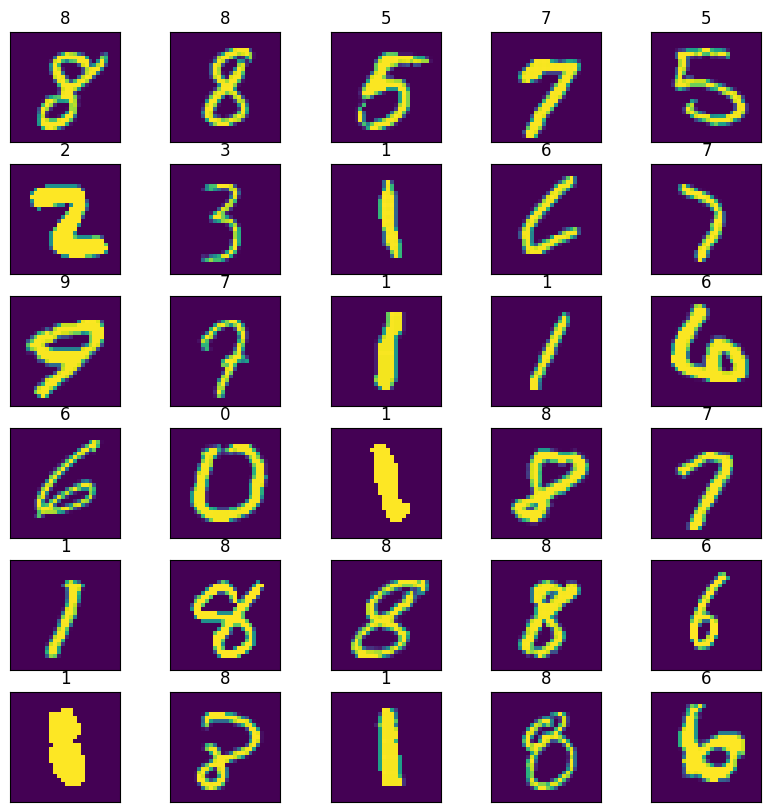

In [14]:
visualize_images('MNIST') # Show some training images

In [15]:
# Load Experiment
config, model, train_losses, test_losses, accuracies = load_experiment("vit-with-20-epochs")

# Create two subplots of train/test losses and accuracies
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(train_losses, label="Train loss")
ax1.plot(test_losses, label="Test loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
ax2.plot(accuracies)
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
plt.savefig("metrics.png")
plt.show()

RuntimeError: Error(s) in loading state_dict for ViTForClassfication:
	Unexpected key(s) in state_dict: "encoder.blocks.0.attention.heads.0.random_features", "encoder.blocks.0.attention.heads.1.random_features", "encoder.blocks.0.attention.heads.2.random_features", "encoder.blocks.0.attention.heads.3.random_features", "encoder.blocks.0.attention.heads.4.random_features", "encoder.blocks.0.attention.heads.5.random_features", "encoder.blocks.0.attention.heads.6.random_features", "encoder.blocks.0.attention.heads.7.random_features", "encoder.blocks.1.attention.heads.0.random_features", "encoder.blocks.1.attention.heads.1.random_features", "encoder.blocks.1.attention.heads.2.random_features", "encoder.blocks.1.attention.heads.3.random_features", "encoder.blocks.1.attention.heads.4.random_features", "encoder.blocks.1.attention.heads.5.random_features", "encoder.blocks.1.attention.heads.6.random_features", "encoder.blocks.1.attention.heads.7.random_features", "encoder.blocks.2.attention.heads.0.random_features", "encoder.blocks.2.attention.heads.1.random_features", "encoder.blocks.2.attention.heads.2.random_features", "encoder.blocks.2.attention.heads.3.random_features", "encoder.blocks.2.attention.heads.4.random_features", "encoder.blocks.2.attention.heads.5.random_features", "encoder.blocks.2.attention.heads.6.random_features", "encoder.blocks.2.attention.heads.7.random_features", "encoder.blocks.3.attention.heads.0.random_features", "encoder.blocks.3.attention.heads.1.random_features", "encoder.blocks.3.attention.heads.2.random_features", "encoder.blocks.3.attention.heads.3.random_features", "encoder.blocks.3.attention.heads.4.random_features", "encoder.blocks.3.attention.heads.5.random_features", "encoder.blocks.3.attention.heads.6.random_features", "encoder.blocks.3.attention.heads.7.random_features". 

In [ ]:
visualize_attention(model,'ImageNet200', "attention.png")